In [32]:
#importing necessary libraries
#data analysis and manipulation libraries
import numpy as np
import pandas as pd
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#importing K-Means
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer
import collections

In [96]:
trdt = pd.read_csv("./Processed data/Reducedtrain.csv")
print("\nNumber of stocks (rows):", len(trdt))
print("\nNumber of days (columns):", len(trdt.columns))
trdt.head(10)


Number of stocks (rows): 2060

Number of days (columns): 21


,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,-0.368007,-10.064990,3.258395,-2.064776,-0.122476,0.437417,-1.691441,-0.378952,4.685162,...,0.767909,-1.986625,4.625380,1.565074,-6.005434,-0.228474,-1.394960,1.943690,3.402267,-0.811967
1,1,17.263404,-15.265948,10.377799,-0.592472,-1.264367,3.611386,5.703059,-0.372988,-0.348697,...,-0.546627,-0.829679,2.375297,1.716167,-2.684364,0.610822,-1.368347,0.980456,-0.663492,0.171209
2,2,-9.257404,-8.886697,1.729462,-3.045100,0.280410,-2.013369,2.178735,-0.865311,-2.539560,...,-0.157535,-0.259474,-1.356678,0.084584,-0.189043,0.061439,-0.320620,1.410063,0.685824,0.443304
3,3,-19.297072,-6.340624,4.602733,-2.218209,0.543421,-3.878398,2.416317,-0.923281,1.238673,...,-0.303418,0.020604,-0.634216,-2.429120,-0.883158,-0.131245,0.631868,-1.032235,-0.026361,0.797480
4,4,-10.685237,-8.160566,3.739268,-2.239043,0.135653,-2.134893,2.601398,-0.535702,-1.333402,...,-0.349147,-0.102956,-0.325314,0.402752,0.395836,0.098520,-0.638689,0.208409,-0.475235,0.205712
5,5,-8.020903,-8.653002,0.005172,-1.563774,-0.549772,1.038135,1.699081,-0.186239,-0.790247,...,-0.431871,-0.103653,0.316800,0.256371,-0.584993,0.158502,-1.284655,0.648504,0.031124,0.177240
6,6,25.420029,-8.941868,-2.207598,10.907168,-0.051934,-8.921308,-1.016756,-0.355337,-0.331090,...,-0.062857,-0.113599,-3.387376,-0.606147,2.222295,-0.029856,1.632075,0.420892,0.421859,-0.071026
7,7,21.675577,-15.951976,4.007436,-3.195450,-1.019994,5.279898,-0.985322,-1.130452,0.696493,...,0.164144,-0.143853,-1.640525,-0.393431,1.103127,-0.491448,-0.691819,1.052132,0.277781,0.048707
8,8,-18.030978,-6.541919,3.459708,-2.620671,0.323330,-2.619319,0.525366,-0.332925,-0.932462,...,-0.174627,-0.289288,-0.026667,0.907121,0.848185,-0.002182,-0.886836,0.000512,-0.198669,-0.107960
9,9,-28.664099,-3.491453,0.243101,-1.646923,-0.002599,-2.793716,2.786971,-0.527510,1.252964,...,-0.923889,-1.872678,0.215772,3.276052,2.851294,0.487142,-1.082119,0.943428,-0.919849,0.476129


In [8]:

#creating an object to determine the value for K
class Get_K(object):
    def __init__(self,start,stop,X):
        self.start=start
        self.stop=stop
        self.X=X
        #in our example, we found out that there were some NaN
        #values in our data, thus we must fill those with 0
        #before passing our features into our model
        #self.X=self.x.fillna(e)
        return 
    def get_k_distortion(self):
        #this method will iterate through different values of K        
        Range=range(self.start,self.stop)
        model = KMeans()
        KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_init=10, n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)
        visualizer = KElbowVisualizer(model, k=Range)
        visualizer.fit(self.X)        # Fit the data to the visualizer
        visualizer.show()        # Finalize and render the figure        
        return
    def get_k_silhouette(self):
        #this method will iterate through different values of K        
        if(self.start==1):
            self.start+=1
        Range=range(self.start,self.stop)
        model = KMeans()
        KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_init=10, n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)
        #Use silhouette score
        visualizer2 = KElbowVisualizer(model, k=Range,metric='silhouette')
        visualizer2.fit(self.X)        # Fit the data to the visualizer
        visualizer2.show()        # Finalize and render the figure
        return
    def get_k_calinski_harabasz(self):
        #this method will iterate through different values of K        
        Range=range(self.start,self.stop)
        model = KMeans()
        KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_init=10, n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)
        #Use silhouette score
        visualizer2 = KElbowVisualizer(model, k=Range,metric='calinski_harabasz')
        visualizer2.fit(self.X)        # Fit the data to the visualizer
        visualizer2.show()        # Finalize and render the figure
        return

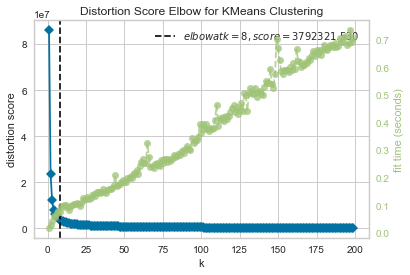

In [9]:
Find_K=Get_K(1, 200,trdt[1:1000])
#Calling get_k method on our Find_K object
Find_K.get_k_distortion()

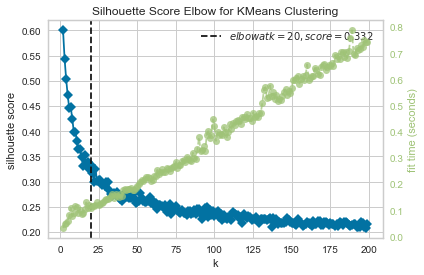

In [10]:
Find_K.get_k_silhouette()

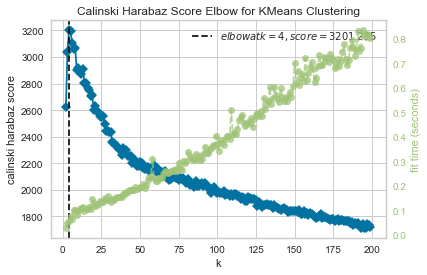

In [11]:
Find_K.get_k_calinski_harabasz()

In [100]:
model = KMeans(algorithm='auto', copy_x=True, init='k-means++', n_clusters=10, max_iter=300, n_init=10, n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)
cluster_idx = model.fit_predict(trdt)
#min(collections.Counter(cluster_idx).values())
collections.Counter(cluster_idx)    


Counter({3: 212,
         1: 210,
         8: 206,
         6: 204,
         4: 202,
         9: 201,
         0: 201,
         7: 203,
         2: 210,
         5: 211})

In [98]:
trdt.insert(21,"cluster",cluster_idx,True)

In [99]:
trdt.head(10)

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,cluster
0,0,-0.368007,-10.064990,3.258395,-2.064776,-0.122476,0.437417,-1.691441,-0.378952,4.685162,...,-1.986625,4.625380,1.565074,-6.005434,-0.228474,-1.394960,1.943690,3.402267,-0.811967,2
1,1,17.263404,-15.265948,10.377799,-0.592472,-1.264367,3.611386,5.703059,-0.372988,-0.348697,...,-0.829679,2.375297,1.716167,-2.684364,0.610822,-1.368347,0.980456,-0.663492,0.171209,2
2,2,-9.257404,-8.886697,1.729462,-3.045100,0.280410,-2.013369,2.178735,-0.865311,-2.539560,...,-0.259474,-1.356678,0.084584,-0.189043,0.061439,-0.320620,1.410063,0.685824,0.443304,2
3,3,-19.297072,-6.340624,4.602733,-2.218209,0.543421,-3.878398,2.416317,-0.923281,1.238673,...,0.020604,-0.634216,-2.429120,-0.883158,-0.131245,0.631868,-1.032235,-0.026361,0.797480,2
4,4,-10.685237,-8.160566,3.739268,-2.239043,0.135653,-2.134893,2.601398,-0.535702,-1.333402,...,-0.102956,-0.325314,0.402752,0.395836,0.098520,-0.638689,0.208409,-0.475235,0.205712,2
5,5,-8.020903,-8.653002,0.005172,-1.563774,-0.549772,1.038135,1.699081,-0.186239,-0.790247,...,-0.103653,0.316800,0.256371,-0.584993,0.158502,-1.284655,0.648504,0.031124,0.177240,2
6,6,25.420029,-8.941868,-2.207598,10.907168,-0.051934,-8.921308,-1.016756,-0.355337,-0.331090,...,-0.113599,-3.387376,-0.606147,2.222295,-0.029856,1.632075,0.420892,0.421859,-0.071026,2
7,7,21.675577,-15.951976,4.007436,-3.195450,-1.019994,5.279898,-0.985322,-1.130452,0.696493,...,-0.143853,-1.640525,-0.393431,1.103127,-0.491448,-0.691819,1.052132,0.277781,0.048707,2
8,8,-18.030978,-6.541919,3.459708,-2.620671,0.323330,-2.619319,0.525366,-0.332925,-0.932462,...,-0.289288,-0.026667,0.907121,0.848185,-0.002182,-0.886836,0.000512,-0.198669,-0.107960,2
9,9,-28.664099,-3.491453,0.243101,-1.646923,-0.002599,-2.793716,2.786971,-0.527510,1.252964,...,-1.872678,0.215772,3.276052,2.851294,0.487142,-1.082119,0.943428,-0.919849,0.476129,2


In [95]:
trdt.to_csv("10_clusters.csv")